In [1]:
import pandas as pd
import time
import numpy
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc

In [11]:
#%% Load data for training and test
train_and_test_pos = pd.read_csv("pos50k.csv")
train_and_test_neg = pd.read_csv("neg50k.csv")
pos = []
neg = []


for i in range(0,len(train_and_test_pos)):
    pos.append(1)

for i in range(0,len(train_and_test_neg)):
    neg.append(0)

train_and_test_pos['indicator_link'] = pos
train_and_test_neg['indicator_link'] = neg

test_public_feature = pd.read_csv("test2k.csv")
print(test_public_feature.shape)

(2000, 14)


In [12]:
# Merge the pos and neg
train_and_test_features = train_and_test_pos.append(train_and_test_neg,ignore_index=True)

# Sort the column name
train_and_test_features = train_and_test_features.reindex(sorted(train_and_test_features.columns), axis=1)
test_public_features = test_public_feature.reindex(sorted(test_public_feature.columns), axis=1)


# Split the train and test dataset
train_features, test_features = train_test_split(train_and_test_features, test_size=0.2, random_state=9)
train_labels = train_features['indicator_link']
test_labels = test_features['indicator_link']
train_features = train_features.drop(['indicator_link'], axis = 1)
test_features = test_features.drop(['indicator_link'], axis = 1)


In [13]:
#RFC and set the timer
trainStartTime = time.time()
rfc=RandomForestClassifier(n_estimators=50,n_jobs = -1,random_state =0, min_samples_leaf = 10, max_depth = 3, criterion = 'entropy')

In [20]:
#possible labels
y_class = [0,1]

#train and validate the RFC
epochs = 10

train_score_curve = []
test_score_curve = []

for i in range(epochs):
    
    #train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.1, random_state=0)
    
    rfc.fit(train_features, train_labels)
    print("========== Step " + str(i) + " ==========")
    
    
    train_score = rfc.score(train_features, train_labels) 
    train_score_curve.append(train_score)
    print("Train score = " + str(train_score))
    
    test_score = rfc.score(test_features, test_labels)
    test_score_curve.append(test_score)
    print("Valid score = " + str(test_score))
    
trainFinishTime = time.time()
print("Time spent on training is: " + str(trainFinishTime - trainStartTime) + " sec")

========== Step 0 ==========
Train score = 0.9985125
Valid score = 0.9989
========== Step 1 ==========
Train score = 0.9985125
Valid score = 0.9989
========== Step 2 ==========
Train score = 0.9985125
Valid score = 0.9989
========== Step 3 ==========
Train score = 0.9985125
Valid score = 0.9989
========== Step 4 ==========
Train score = 0.9985125
Valid score = 0.9989
========== Step 5 ==========
Train score = 0.9985125
Valid score = 0.9989
========== Step 6 ==========
Train score = 0.9985125
Valid score = 0.9989
========== Step 7 ==========
Train score = 0.9985125
Valid score = 0.9989
========== Step 8 ==========
Train score = 0.9985125
Valid score = 0.9989
========== Step 9 ==========
Train score = 0.9985125
Valid score = 0.9989
Time spent on training is: 259.91979813575745 sec


In [21]:
#Predict on the test set and get the probability
test_predicted_probability = rfc.predict_proba(test_features)
print("predict = " + str(test_predicted_probability))



predict = [[9.69184579e-01 3.08154211e-02]
 [3.41157068e-02 9.65884293e-01]
 [9.82052281e-01 1.79477187e-02]
 ...
 [3.05498248e-04 9.99694502e-01]
 [3.19567377e-02 9.68043262e-01]
 [5.61678599e-04 9.99438321e-01]]


In [49]:
# test on test-public features
test_public_predicted_probability = rfc.predict_proba(test_public_features)
test_public_predicted_label = rfc.predict(test_public_features)


print(test_public_predicted_probability)

count_true_link = 0
count_fake_link = 0
for instance in test_public_predicted_label:
    if instance == 0:
        count_fake_link = count_fake_link + 1
    if instance == 1:
        count_true_link = count_true_link + 1
print("#True = " + str(count_true_link))
print("#Fake = " + str(count_fake_link))


t = 0
pros = test_public_predicted_probability[:, 1]
for pro in pros:
    t = t + pro
avg = t/2000
print(avg)

count1 = 0
count2 = 0
index = 0
for pro in pros:
    if pro >= avg:
        if (pro + 0.01) >= 1:
            test_public_predicted_probability[index, 1] = 1
        elif (pro + 0.01) < 1:
            test_public_predicted_probability[index, 1] = pro + 0.01
        count1 = count1 + 1
    elif pro < avg:
        if (pro - 0.01) <= 0:
            test_public_predicted_probability[index, 1] = 0
        elif (pro - 0.01) > 0:
            test_public_predicted_probability[index, 1] = pro - 0.01
        count2 = count2 + 1
    index = index + 1
        
print(count1)
print(count2)

t = 0
pros = test_public_predicted_probability[:, 1]
for pro in pros:
    t = t + pro
avg = t/2000
print(avg)


count1 = 0
count2 = 0
index = 0
for pro in pros:
    if pro >= avg:
        
        count1 = count1 + 1
    elif pro < avg:
        
        count2 = count2 + 1
    index = index + 1

print(count1)
print(count2)


df_test_public_result = pd.DataFrame(columns=['Id', 'Predicted'])
id_list = []
for i in range(1,2001):
        id_list.append(i)

df_test_public_result['Id'] = id_list
df_test_public_result['Predicted'] = test_public_predicted_probability[:,1]

print(test_public_predicted_probability)
print(df_test_public_result)

[[0.07047379 0.92952621]
 [0.07594577 0.92405423]
 [0.00274973 0.99725027]
 ...
 [0.12801687 0.87198313]
 [0.13381416 0.86618584]
 [0.12801687 0.87198313]]
#True = 1945
#Fake = 55
0.918771616138101
1580
420
0.9215458906066193
1580
420
[[0.07047379 0.93952621]
 [0.07594577 0.93405423]
 [0.00274973 1.        ]
 ...
 [0.12801687 0.86198313]
 [0.13381416 0.85618584]
 [0.12801687 0.86198313]]
        Id  Predicted
0        1   0.939526
1        2   0.934054
2        3   1.000000
3        4   1.000000
4        5   0.939874
...    ...        ...
1995  1996   0.861983
1996  1997   0.994010
1997  1998   0.861983
1998  1999   0.856186
1999  2000   0.861983

[2000 rows x 2 columns]


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

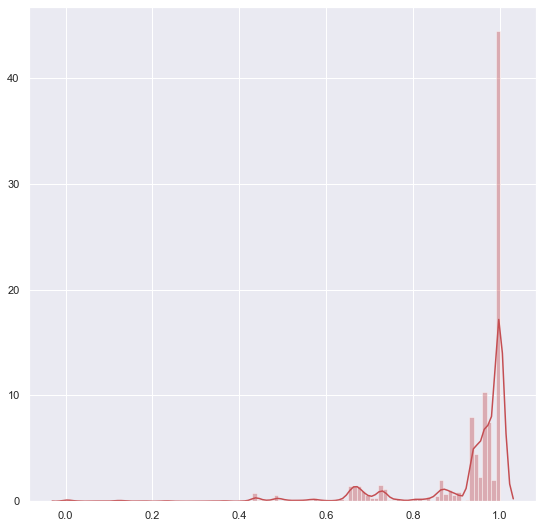

In [45]:
sns.set(rc={"figure.figsize": (20, 20)})
subplot(2,2,1)
ax = sns.distplot(test_public_predicted_probability[:, 1], bins=100, color='r')

In [50]:
# save to csv
df_test_public_result.to_csv('result_new_6.csv', index=False)

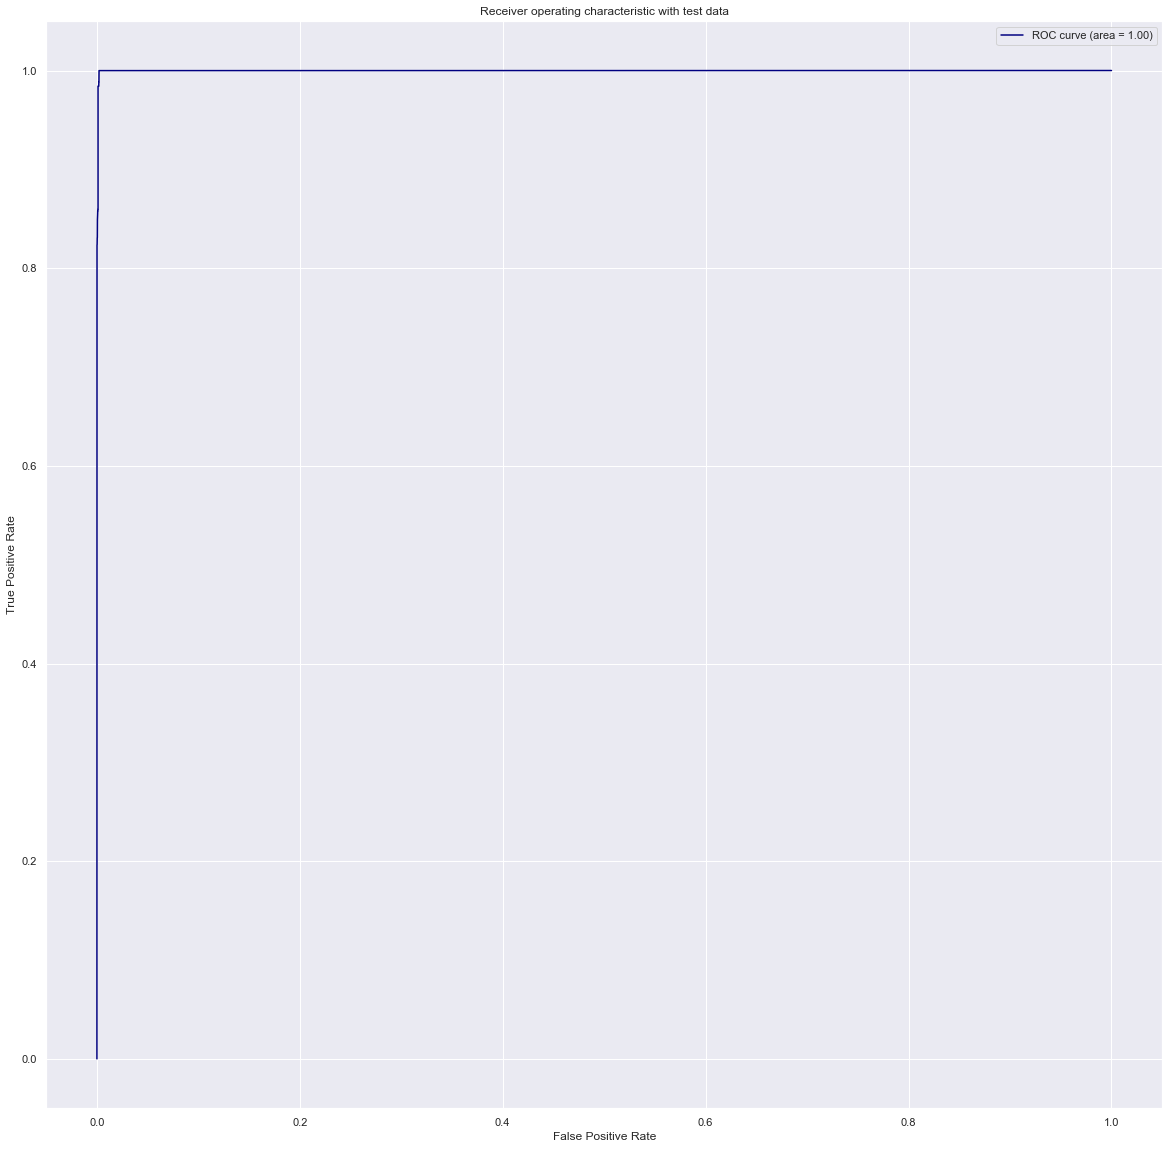

In [47]:
# %% ROC Curve & AUC
fpr,tpr, thresholds = roc_curve(test_labels, test_predicted_probability[:,1])
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

Text(0, 0.5, 'Accuracy')

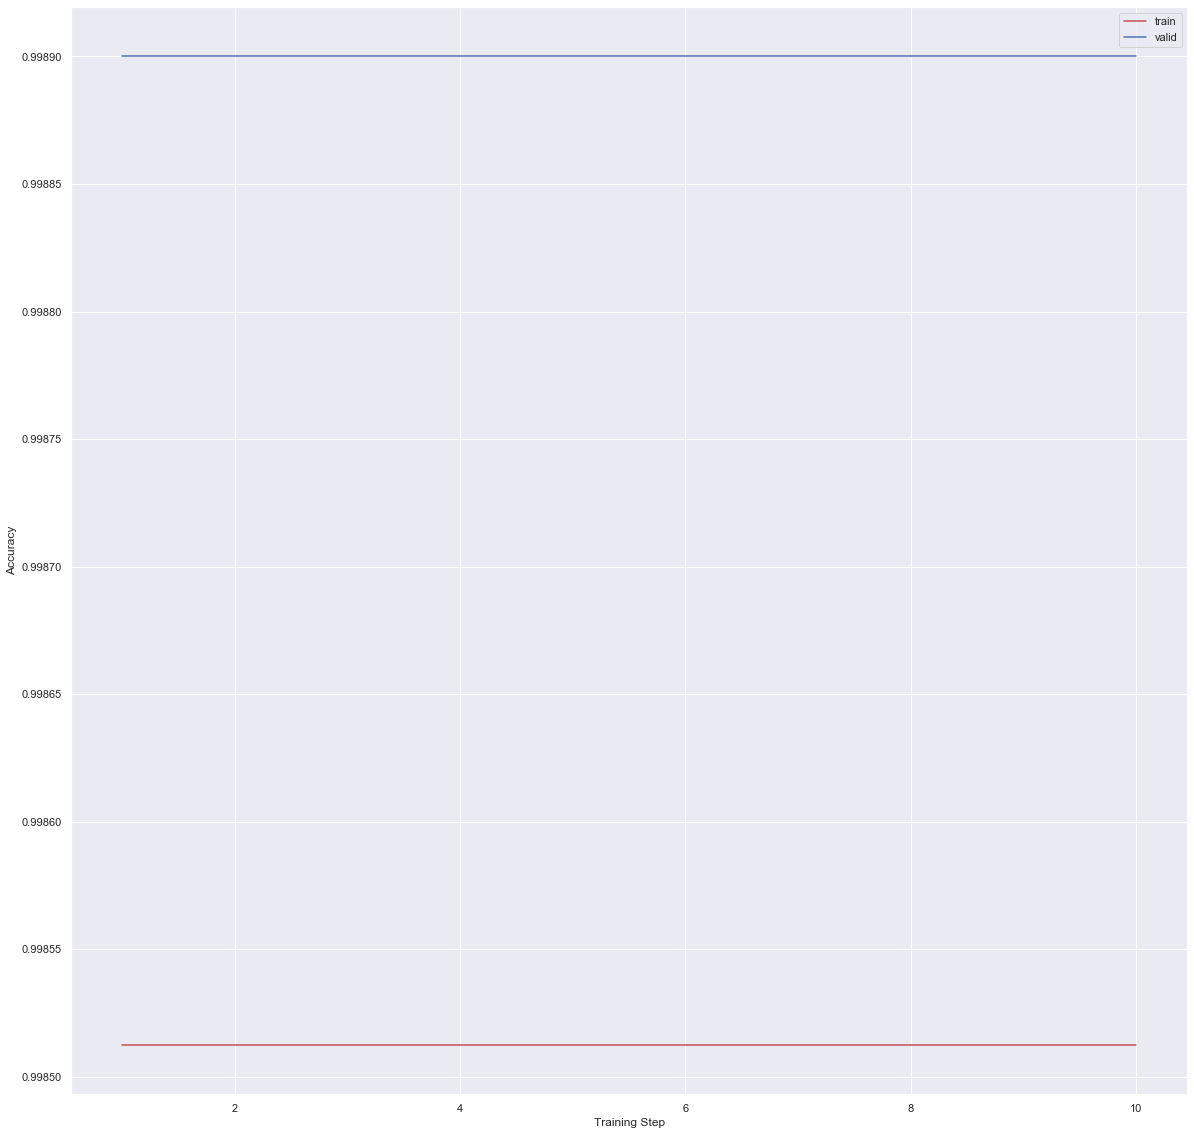

In [48]:
# %% Plot training and valid curve

plt.close('all')
x_axis = []
for i in range(epochs):
    x_axis.append(i+1)

plt.figure()
plt.plot(x_axis, train_score_curve, "r", x_axis, test_score_curve, "b")
plt.legend(labels=['train','valid'],loc='best')
plt.xlabel("Training Step")
plt.ylabel("Accuracy")